In [3]:
!pip uninstall -y numpy mediapipe opencv-python
!pip install numpy==1.26.3
!pip install mediapipe opencv-python scikit-learn

Found existing installation: numpy 1.26.3
Uninstalling numpy-1.26.3:
  Successfully uninstalled numpy-1.26.3
  Using cached numpy-1.26.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires opencv-python>=3.4.8.29, which is not installed.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.3 which is incompatible.


  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl (35.6 MB)
Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (63.0 MB)


In [4]:
import numpy as np
import mediapipe as mp
import cv2
from sklearn.neighbors import KNeighborsClassifier

print("NumPy version:", np.__version__)

NumPy version: 1.26.3


In [5]:
import os
import cv2
import numpy as np
import mediapipe as mp
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


#  Dataset path

data_path = '/content/drive/MyDrive/Train_Alphabet'


#  Setting up MediaPipe for hand landmark extraction

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)


#  Listing all folders (classes)

classes = sorted([folder for folder in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, folder))])
print(f"Found classes: {classes}")

X = []
y = []


#  Extracting landmarks for each image

for label in classes:
    folder = os.path.join(data_path, label)
    images = os.listdir(folder)
    print(f"Processing {label} with {len(images)} images...")

    for img_name in images:
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Could not read image {img_path}, skipping.")
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)

        if results.multi_hand_landmarks:
            landmarks = []
            for lm in results.multi_hand_landmarks[0].landmark:
                landmarks.extend([lm.x, lm.y, lm.z])
            X.append(landmarks)
            y.append(label)
        else:
            pass  # Skip images where no hand was detected

hands.close()

print(f"\n Total samples extracted: {len(X)}")


#  Convert to numpy arrays

X = np.array(X)
y = np.array(y)


#  Split (70% train, 30% test)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


#  Train MLP Classifier

clf = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
clf.fit(X_train, y_train)


#  Evaluate

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


#  Plot confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#  Save trained model

joblib.dump(clf, 'asl_trained_model.pkl')
print(" Model saved as 'asl_trained_model.pkl'")


Found classes: ['A', 'B', 'Blank', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Processing A with 920 images...
Processing B with 900 images...


KeyboardInterrupt: 

 Model loaded successfully!

Found classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Processing A with 100 images...
Processing B with 100 images...
Processing C with 100 images...
Processing D with 100 images...
Processing E with 100 images...
Processing F with 100 images...
Processing G with 100 images...
Processing H with 100 images...
Processing I with 100 images...
Processing J with 100 images...
Processing K with 100 images...
Processing L with 100 images...
Processing M with 100 images...
Processing N with 100 images...
Processing O with 100 images...
Processing P with 100 images...
Processing Q with 100 images...
Processing R with 100 images...
Processing S with 100 images...
Processing T with 100 images...
Processing U with 100 images...
Processing V with 100 images...
Processing W with 100 images...
Processing X with 100 images...
Processing Y with 100 images...
Processing Z with 100 ima

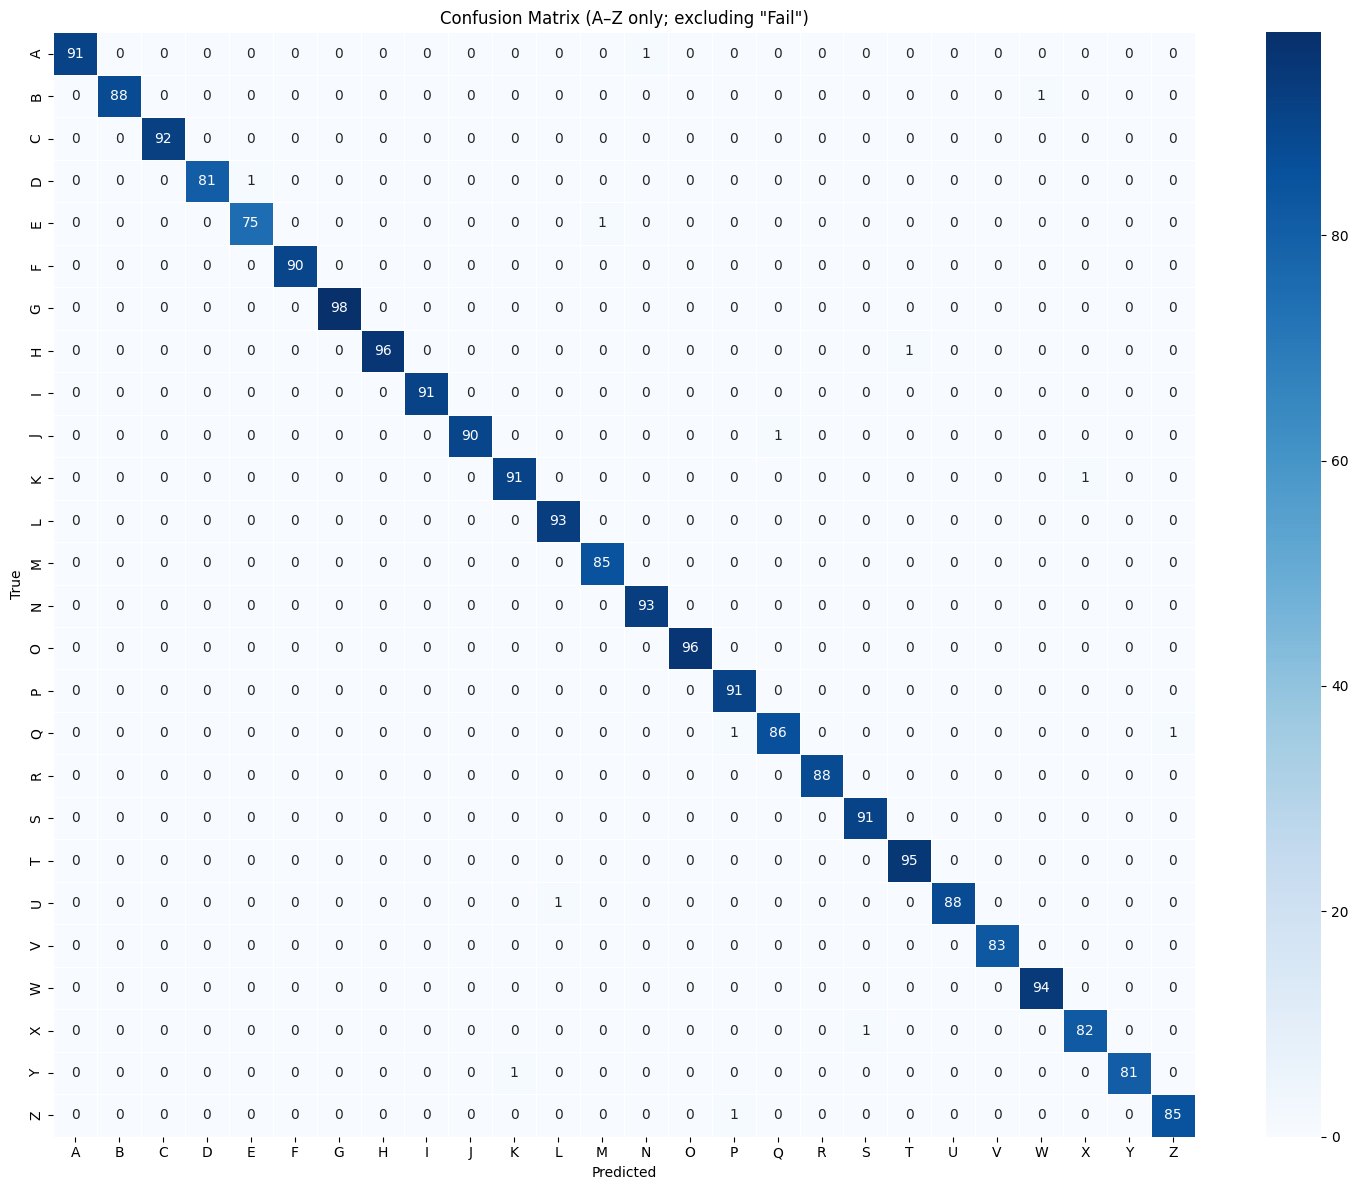


==== Classification Report (A–Z + 'Fail') ====

              precision    recall  f1-score   support

           A       1.00      0.99      0.99        92
           B       1.00      0.99      0.99        89
           C       1.00      1.00      1.00        92
           D       1.00      0.99      0.99        82
           E       0.99      0.99      0.99        76
           F       1.00      1.00      1.00        90
           G       1.00      1.00      1.00        98
           H       1.00      0.99      0.99        97
           I       1.00      1.00      1.00        91
           J       1.00      0.99      0.99        91
           K       0.99      0.99      0.99        92
           L       0.99      1.00      0.99        93
           M       0.99      1.00      0.99        85
           N       0.99      1.00      0.99        93
           O       1.00      1.00      1.00        96
           P       0.98      1.00      0.99        91
           Q       0.99      0.9

In [7]:

#  Import Libraries

import os
import cv2
import numpy as np
import mediapipe as mp
import joblib
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_recall_fscore_support
)
import matplotlib.pyplot as plt
import seaborn as sns


#  Load Trained Model

model = joblib.load('/content/asl_trained_model Mediapipe Trained.pkl')
print(" Model loaded successfully!")


#  Test Folder Path

test_data_path = '/content/drive/MyDrive/Test_Alphabet'


#  Setup MediaPipe

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)


#  List All Classes (folders A-Z)

classes = sorted([folder for folder in os.listdir(test_data_path) if os.path.isdir(os.path.join(test_data_path, folder))])
print(f"\nFound classes: {classes}")

# Add 'Fail' as a class for internal evaluation and classification report
all_labels = classes + ['Fail']

X_test = []
y_test = []


#  Process each class folder

for label in classes:
    folder_path = os.path.join(test_data_path, label)
    images = os.listdir(folder_path)
    print(f"Processing {label} with {len(images)} images...")

    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            print(f" Could not read image {img_path}, skipping.")
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)

        if results.multi_hand_landmarks:
            landmarks = []
            for lm in results.multi_hand_landmarks[0].landmark:
                landmarks.extend([lm.x, lm.y, lm.z])
            X_test.append(landmarks)
            y_test.append(label)
        else:
            # If no hand detected, mark as fail (for internal use)
            X_test.append([0] * 63)  # 21 landmarks * 3 (x, y, z)
            y_test.append('Fail')    # Label as "Fail" for internal use

hands.close()

print(f"\n Total test samples processed: {len(X_test)}")


#  Convert to numpy arrays

X_test = np.array(X_test)
y_test = np.array(y_test)


#  Prediction

y_pred = model.predict(X_test)


#  Overall Metrics
#    Classification Accuracy
#    Macro Precision / Recall / F1

accuracy_incl_fail = accuracy_score(y_test, y_pred)
macro_p_all, macro_r_all, macro_f1_all, _ = precision_recall_fscore_support(
    y_test,
    y_pred,
    labels=all_labels,       # include A–Z + Fail
    average='macro',
    zero_division=0
)

print("\n==== Overall Metrics (A–Z + 'Fail') ====")
print(f"  Classification Accuracy: {accuracy_incl_fail * 100:.2f}%")
print(f"  Macro Precision: {macro_p_all:.4f}")
print(f"  Macro Recall:    {macro_r_all:.4f}")
print(f"  Macro F1-Score:  {macro_f1_all:.4f}")


#  Confusion Matrix

mask_letters = y_test != 'Fail'
y_true_letters = y_test[mask_letters]
y_pred_letters = y_pred[mask_letters]

if y_true_letters.size > 0:
    cm_letters = confusion_matrix(y_true_letters, y_pred_letters, labels=classes)

    plt.figure(figsize=(15, 12))
    sns.heatmap(
        cm_letters,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=classes,
        yticklabels=classes,
        linewidths=0.5
    )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (A–Z only; excluding "Fail")')
    plt.tight_layout()
    plt.show()
else:
    print("\n No A–Z ground-truth samples available (all were 'Fail'). Skipping confusion matrix.")


#  Classification Report

print("\n==== Classification Report (A–Z + 'Fail') ====\n")
print(classification_report(y_test, y_pred, labels=all_labels, zero_division=0))
